<a href="https://colab.research.google.com/github/Ayush-Sharma15/Zeotap/blob/main/EDA_zeotap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EDA**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV files
customers_df = pd.read_csv("https://raw.githubusercontent.com/Ayush-Sharma15/Zeotap/refs/heads/main/Customers.csv")
products_df = pd.read_csv("https://raw.githubusercontent.com/Ayush-Sharma15/Zeotap/refs/heads/main/Products.csv")
transactions_df = pd.read_csv("https://raw.githubusercontent.com/Ayush-Sharma15/Zeotap/refs/heads/main/Transactions.csv")

# Display first few rows
print("Customers Data:\n", customers_df.head())
print("\nProducts Data:\n", products_df.head())
print("\nTransactions Data:\n", transactions_df.head())


Customers Data:
   CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data:
   ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Data:
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C01

In [9]:
# Print Shape
print("Dataset Shapes:")
print("Customers:", customers_df.shape)
print("Products:", products_df.shape)
print("Transactions:", transactions_df.shape)


Dataset Shapes:
Customers: (200, 6)
Products: (100, 4)
Transactions: (1000, 9)


In [10]:
# Print First 5 Rows
print("\nCustomers Data:\n", customers_df.head())
print("\nProducts Data:\n", products_df.head())
print("\nTransactions Data:\n", transactions_df.head())


Customers Data:
   CustomerID        CustomerName         Region SignupDate  SignupYear  \
0      C0001    Lawrence Carroll  South America 2022-07-10        2022   
1      C0002      Elizabeth Lutz           Asia 2022-02-13        2022   
2      C0003      Michael Rivera  South America 2024-03-07        2024   
3      C0004  Kathleen Rodriguez  South America 2022-10-09        2022   
4      C0005         Laura Weber           Asia 2022-08-15        2022   

   SignupMonth  
0            7  
1            2  
2            3  
3           10  
4            8  

Products Data:
   ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Data:
   TransactionID CustomerID ProductID     Transact

In [11]:
# Print General Info
print("\nCustomers Info:")
print(customers_df.info())
print("\nProducts Info:")
print(products_df.info())
print("\nTransactions Info:")
print(transactions_df.info())


Customers Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
 4   SignupYear    200 non-null    int32         
 5   SignupMonth   200 non-null    int32         
dtypes: datetime64[ns](1), int32(2), object(3)
memory usage: 7.9+ KB
None

Products Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memo

In [12]:
# Check for Missing Values
print("\nMissing Values Count:")
print("Customers:\n", customers_df.isnull().sum())
print("Products:\n", products_df.isnull().sum())
print("Transactions:\n", transactions_df.isnull().sum())


Missing Values Count:
Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
SignupYear      0
SignupMonth     0
dtype: int64
Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions:
 TransactionID       0
CustomerID          0
ProductID           0
TransactionDate     0
Quantity            0
TotalValue          0
Price               0
TransactionYear     0
TransactionMonth    0
dtype: int64


In [13]:
# Check for Duplicates
print("\nDuplicate Rows Count:")
print("Customers:", customers_df.duplicated().sum())
print("Products:", products_df.duplicated().sum())
print("Transactions:", transactions_df.duplicated().sum())


Duplicate Rows Count:
Customers: 0
Products: 0
Transactions: 0


In [14]:
# Drop duplicates if found
customers_df.drop_duplicates(inplace=True)
products_df.drop_duplicates(inplace=True)
transactions_df.drop_duplicates(inplace=True)

In [15]:
# Convert Date Columns
customers_df["SignupDate"] = pd.to_datetime(customers_df["SignupDate"], format='mixed', errors='coerce')
transactions_df["TransactionDate"] = pd.to_datetime(transactions_df["TransactionDate"], format='mixed', errors='coerce')

# Extract Date Features
customers_df["SignupYear"] = customers_df["SignupDate"].dt.year
customers_df["SignupMonth"] = customers_df["SignupDate"].dt.month

transactions_df["TransactionYear"] = transactions_df["TransactionDate"].dt.year
transactions_df["TransactionMonth"] = transactions_df["TransactionDate"].dt.month

# Verify Changes
print("\nUpdated Customers Data Types:\n", customers_df.dtypes)
print("\nUpdated Transactions Data Types:\n", transactions_df.dtypes)



Updated Customers Data Types:
 CustomerID              object
CustomerName            object
Region                  object
SignupDate      datetime64[ns]
SignupYear               int32
SignupMonth              int32
dtype: object

Updated Transactions Data Types:
 TransactionID               object
CustomerID                  object
ProductID                   object
TransactionDate     datetime64[ns]
Quantity                     int64
TotalValue                 float64
Price                      float64
TransactionYear              int32
TransactionMonth             int32
dtype: object


In [16]:
# Summary Statistics for Numeric Columns
print("\nTransactions Summary:\n", transactions_df.describe())
print("\nProducts Summary:\n", products_df.describe())
print("\nCustomers Summary:\n", customers_df.describe(include="all"))  # Includes categorical variables



Transactions Summary:
                      TransactionDate     Quantity   TotalValue       Price  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

       TransactionYear  TransactionMonth  
count      1000.000000       1000.000000  
mean       2023.996000          6.288000  
min        2023.000000          1.000000  
25%        2024.000000          3.000000  
50%        2024.000000          6.000000  
75%        2024

**UNIVARIATE ANALYSIS**

 Customer Distribution by Region

<ipython-input-17-7fa4b5cfee9c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Region", data=customers_df, palette="viridis")


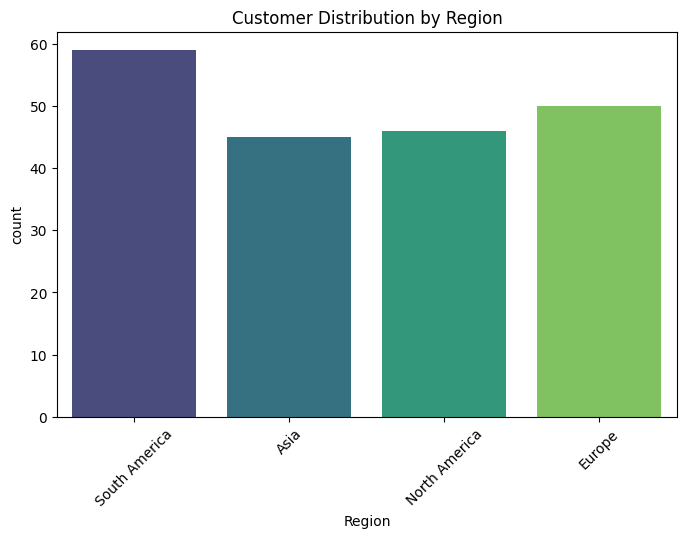

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(x="Region", data=customers_df, palette="viridis")
plt.title("Customer Distribution by Region")
plt.xticks(rotation=45)
plt.show()


Product Category Distribution

<ipython-input-18-073431fe6d0e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Category", data=products_df, palette="coolwarm", order=products_df["Category"].value_counts().index)


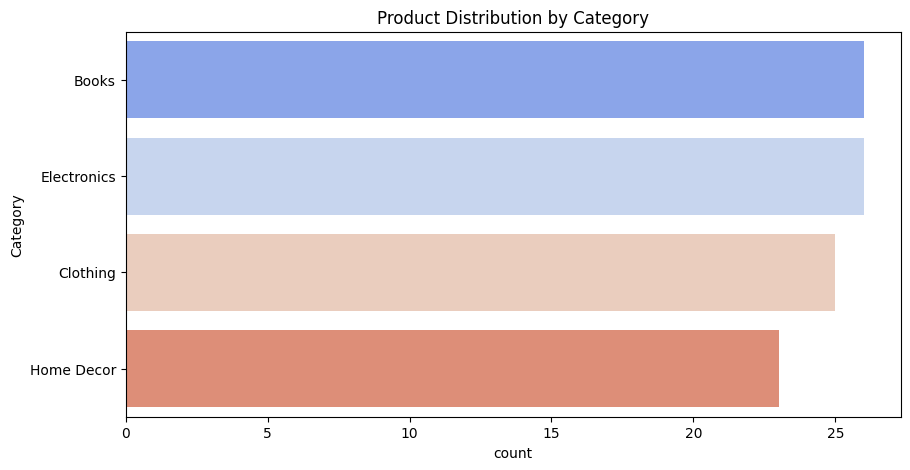

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(y="Category", data=products_df, palette="coolwarm", order=products_df["Category"].value_counts().index)
plt.title("Product Distribution by Category")
plt.show()


Distribution of Total Transaction Value

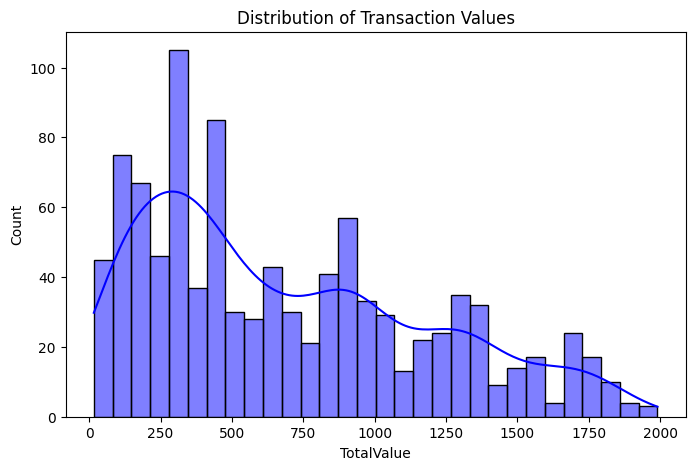

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(transactions_df["TotalValue"], bins=30, kde=True, color="blue")
plt.title("Distribution of Transaction Values")
plt.show()


**BIVARIATE ANALYSIS**

Relationship between Region & Total Transactions

<ipython-input-21-bb5d78c9a819>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Region", y="TotalValue", data=merged_df, palette="Set2")


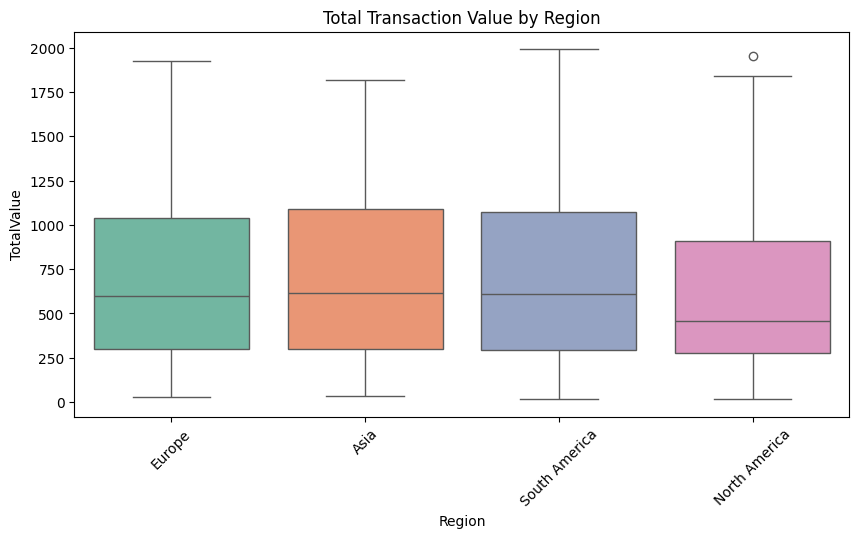

In [21]:
# Merge transactions with customers on 'CustomerID'
merged_df = transactions_df.merge(customers_df, on="CustomerID", how="left")

# Now, 'Region' is available in merged_df
plt.figure(figsize=(10,5))
sns.boxplot(x="Region", y="TotalValue", data=merged_df, palette="Set2")
plt.title("Total Transaction Value by Region")
plt.xticks(rotation=45)
plt.show()


Monthly Sales Trend

<ipython-input-22-25bebaceecd8>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="TransactionMonth", y="TotalValue", data=transactions_df, marker="o", ci=None)


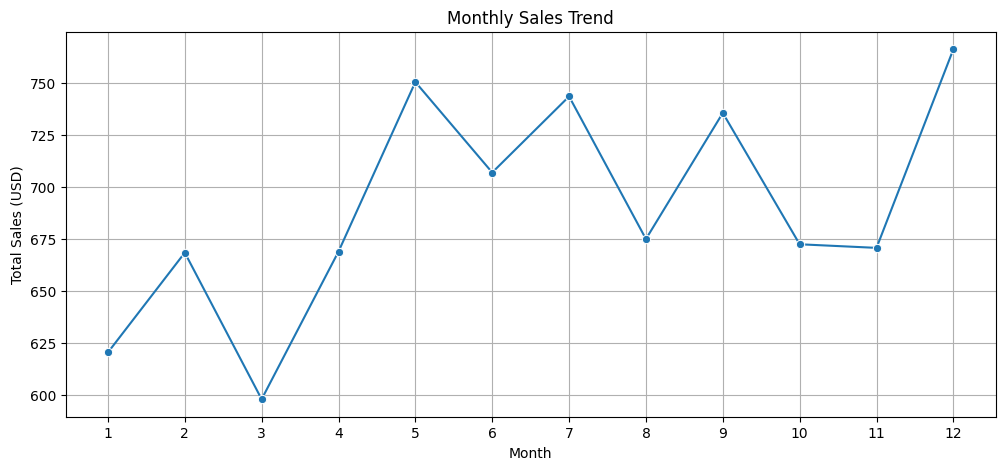

In [22]:
plt.figure(figsize=(12,5))
sns.lineplot(x="TransactionMonth", y="TotalValue", data=transactions_df, marker="o", ci=None)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales (USD)")
plt.xticks(range(1,13))
plt.grid(True)
plt.show()


**Multivariate Analysis**

Correlation Heatmap

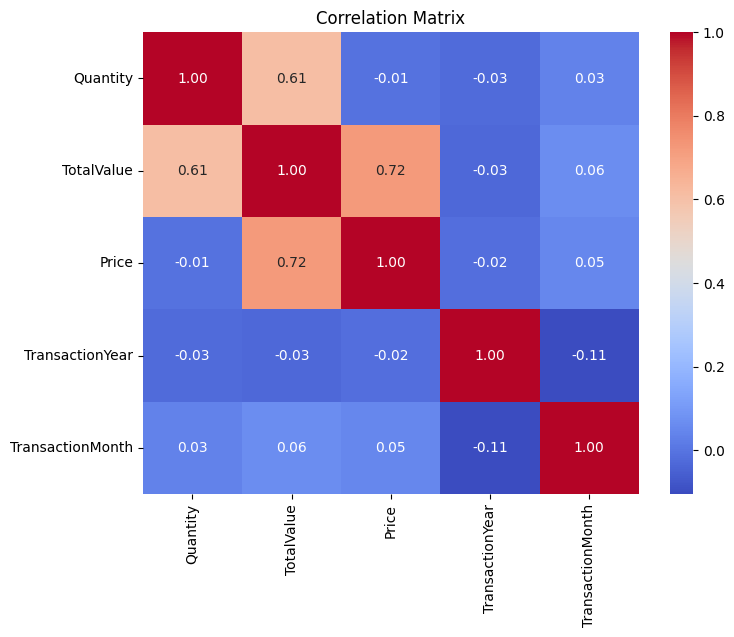

In [24]:
# Select only numeric columns for correlation
numeric_cols = transactions_df.select_dtypes(include=["number"])

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


 Pairplot for Key Numeric Variables

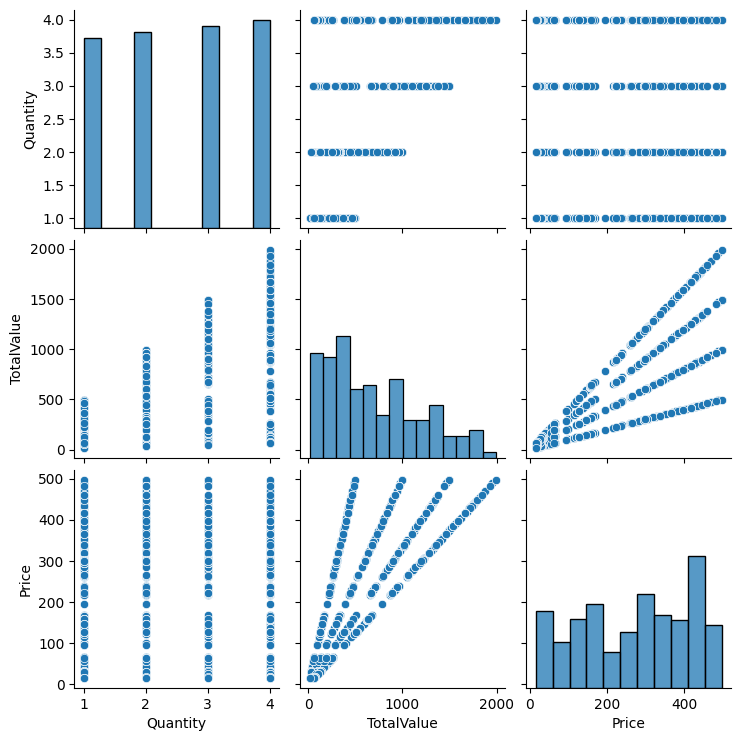

In [25]:
sns.pairplot(transactions_df[["Quantity", "TotalValue", "Price"]])
plt.show()
